In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import cancer_data
import many

import config

config.config_visuals()

In [2]:
ccle_genex = cancer_data.load("ccle_gene_tpm")
ccle_transcripts = cancer_data.load("ccle_transcript_tpm")
exonusage = cancer_data.load("ccle_exonusage")
rppa = cancer_data.load("ccle_rppa")
ms_prot = cancer_data.load("ccle_proteomics")

mdm4_exon_6 = exonusage[
    [
        "MDM4_3p_chr1_204506558_204506625_ENSG00000198625.8",
        "MDM4_5p_chr1_204506558_204506625_ENSG00000198625.8",
    ]
].mean(axis=1)

avana = cancer_data.load("avana")
drive = cancer_data.load("drive")

tcga_genex = cancer_data.load("tcga_normalized_gene_expression")

tcga_se = cancer_data.load("tcga_se")
# keep first four identifier fields
tcga_se.index = tcga_se.index.map(lambda x: "-".join(x.split("-")[:4]))
# remove last letter
tcga_se.index = tcga_se.index.map(lambda x: x[:-1])
tcga_se = tcga_se[tcga_se.index.map(lambda x: x[-2:] != "11")]

tcga_se = tcga_se.loc[tcga_se.index.drop_duplicates(keep="first")]

tcga_a3ss = cancer_data.load("tcga_a3ss")
# keep first four identifier fields
tcga_a3ss.index = tcga_a3ss.index.map(lambda x: "-".join(x.split("-")[:4]))
# remove last letter
tcga_a3ss.index = tcga_a3ss.index.map(lambda x: x[:-1])
tcga_a3ss = tcga_a3ss[tcga_a3ss.index.map(lambda x: x[-2:] != "11")]

tcga_a3ss = tcga_a3ss.loc[tcga_a3ss.index.drop_duplicates(keep="first")]

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [34]:
rpl22l1_exonusage = many.stats.mat_corr_nan(
    ccle_genex["RPL22L1_ENSG00000163584.13"],
    exonusage,
    method="pearson",
    melt=True,
)

Text(0, 0.5, 'UBAP2L chr1:154242676-154243329')

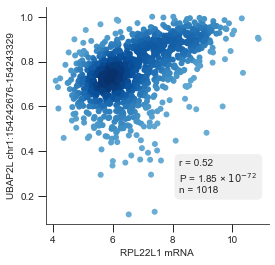

In [85]:
plt.figure(figsize=(4,4))

many.visuals.dense_regression(
    ccle_genex["RPL22L1_ENSG00000163584.13"],
    exonusage["UBAP2L_5p_chr1_154242676_154243329_ENSG00000143569.14"],
    "spearman",
    colormap="Blues",
    cmap_offset=1,
    text_pos=(0.6,0.3),
)

plt.xlabel("RPL22L1 mRNA")
plt.ylabel("UBAP2L chr1:154242676-154243329")

In [83]:
tcga_se = tcga_se.loc[tcga_se.index.drop_duplicates(keep="first")]

Text(0, 0.5, 'UBAP2L exon 29')

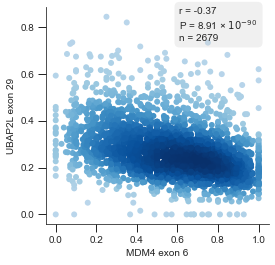

In [18]:
plt.figure(figsize=(4, 4))

many.visuals.dense_regression(
    tcga_se[
        "ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
    ],
    tcga_se[
        "ENSG00000143569.14_ES_1_154241382:154241430:154241837:154241888:154242675:154243040_154241837:154241888"
    ],
    "spearman",
    colormap="Blues",
    cmap_offset=1,
    text_pos=(0.6, 1),
)

plt.xlabel("MDM4 exon 6")
plt.ylabel("UBAP2L exon 29")

Text(0, 0.5, 'RPL22L1 exon 3A')

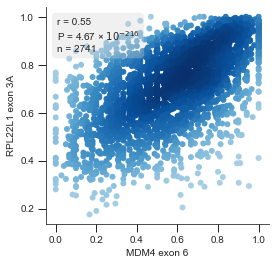

In [23]:
plt.figure(figsize=(4, 4))

many.visuals.dense_regression(
    tcga_se[
        "ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
    ],
    tcga_a3ss[
        "ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"
    ],
    "spearman",
    colormap="Blues",
    cmap_offset=1,
    text_pos=(0.05, 0.95),
)

plt.xlabel("MDM4 exon 6")
plt.ylabel("RPL22L1 exon 3A")

Text(0, 0.5, 'UBAP2L exon 29')

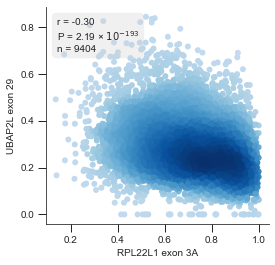

In [24]:
plt.figure(figsize=(4, 4))

many.visuals.dense_regression(
    tcga_a3ss[
        "ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"
    ],
    tcga_se[
        "ENSG00000143569.14_ES_1_154241382:154241430:154241837:154241888:154242675:154243040_154241837:154241888"
    ],
    "spearman",
    colormap="Blues",
    cmap_offset=1,
    text_pos=(0.05, 0.95),
)

plt.xlabel("RPL22L1 exon 3A")
plt.ylabel("UBAP2L exon 29")

In [13]:
ubap2l_tcga = tcga_se[[x for x in tcga_se.columns if x.startswith("ENSG00000143569")]]
# ubap2l_tcga = tcga_se[[x for x in tcga_se.columns if x.startswith("ENSG00000198625")]]

rpl22l1_ubap2l = many.stats.mat_corr_nan(
#     tcga_se[
#         "ENSG00000198625.8_ES_1_204501318:204501374:204506557:204506625:204507336:204507436_204506557:204506625"
#     ],
    tcga_a3ss["ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"],
    ubap2l_tcga,
    method="pearson",
    melt=True,
)

<AxesSubplot:xlabel='ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990', ylabel='Count'>

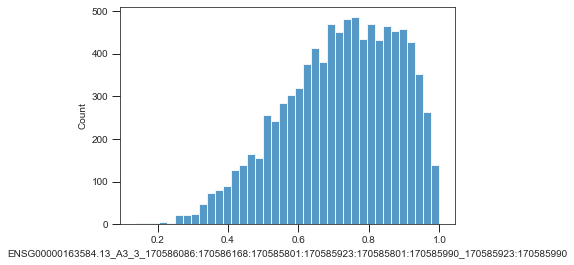

In [10]:
sns.histplot(tcga_a3ss["ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990"])

In [14]:
rpl22l1_ubap2l

,,pearson,n,pval,qval
b_col,a_col,,,,
ENSG00000143569.14_ES_1_154241382:154241430:154241837:154241888:154242675:154243040_154241837:154241888,ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990,-0.090537,9404,17.850925,16.452985
ENSG00000143569.14_ES_1_154213988:154214041:154214175:154214273:154215692:154215754_154214175:154214273,ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990,-0.044290,9089,4.619655,3.522745
ENSG00000143569.14_ES_1_154241296:154241430:154241870:154241888:154243356:154243485_154241870:154241888,ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990,0.043973,7943,4.053353,3.132534
ENSG00000143569.14_ES_1_154223956:154224129:154226406:154226565:154227311:154227366_154226406:154226565,ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990,0.208497,137,1.839034,1.132119
ENSG00000143569.14_ES_1_154227727:154227802:154228158:154228231:154229582:154229734_154228158:154228231,ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990,0.067000,1324,1.831089,1.132119
ENSG00000143569.14_ES_1_154241296:154241430:154241837:154241888:154243158:154243328_154241837:154241888,ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990,-0.093658,366,1.133593,0.513804
ENSG00000143569.14_ES_1_154227311:154227366:154227636:154227802:154228158:154228231_154227636:154227802,ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990,0.104655,250,1.005506,0.488046
ENSG00000143569.14_ES_1_154201090:154201201:154207066:154207268:154207671:154207767_154207066:154207268,ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990,0.022005,5459,0.982896,0.488046
ENSG00000143569.14_ES_1_154201090:154201201:154207066:154207214:154207671:154207767_154207066:154207214,ENSG00000163584.13_A3_3_170586086:170586168:170585801:170585923:170585801:170585990_170585923:170585990,0.098036,205,0.790541,0.346844
